## 1. Importing Libraries and Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [11]:
# In order to access the dataset, we need to create a path
path = r'C:\Users\Ratul\anaconda_projects\Machine Learning\Weather Stations'

In [12]:
# Import the weather data
X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_clean.csv'), index_col = False)

In [13]:
# Import predictions data

Y = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [14]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [15]:
X.shape

(22950, 137)

In [16]:
Y.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
Y.shape

(22950, 16)

## 2. Data Wrangling

In [18]:
#Reduce observations dataset to 2010's
X_dec = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
X_dec

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [19]:
# Reduce answers dataset to 2010's

Y_dec = Y[(Y['DATE'].astype(str).str[:4] >= '2010') & (Y['DATE'].astype(str).str[:4] <= '2019')]
Y_dec

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [21]:
# Extract stations list

stations = [col.split('_')[0] for col in X.columns if '_' in col]

In [22]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [23]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  X_dec.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  X_dec[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
HEATHROW: 32868 entries
KASSEL: 32868 entries
DEBILT: 32868 entries
SONNBLICK: 32868 entries
BELGRADE: 32868 entries
LJUBLJANA: 32868 entries
BASEL: 32868 entries
STOCKHOLM: 32868 entries
MADRID: 32868 entries
DUSSELDORF: 32868 entries
MUNCHENB: 32868 entries
OSLO: 32868 entries
BUDAPEST: 32868 entries
VALENTIA: 32868 entries
MAASTRICHT: 32868 entries


### All cells show to be having the same number of entries, which is a good point to start. 

In [25]:
# Drop unnecessary columns

X_dec.drop(['DATE', 'MONTH'], axis=1, inplace=True)

C:\Users\Ratul\AppData\Local\Temp\ipykernel_20980\2805786883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dec.drop(['DATE', 'MONTH'], axis=1, inplace=True)


In [26]:
X_dec.shape # observations dataset has the correct shape

(3652, 135)

In [27]:
Y_dec.drop(columns = 'DATE', inplace = True)

C:\Users\Ratul\AppData\Local\Temp\ipykernel_20980\3691106292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_dec.drop(columns = 'DATE', inplace = True)


In [28]:
Y_dec.shape # predictions dataset has the correct shape

(3652, 15)

## 03 Reshaping for modeling
The final shapes should be X = (3653, 135) and y = (3653,) for one decade of information.

In [29]:
X = X_dec

In [30]:
y = Y_dec

In [31]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [32]:
X.shape

(3652, 135)

In [33]:
y.shape

(3652, 15)

## 04 Data Split 

In [34]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 5. Random Forest Model

In [36]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.583789704271632


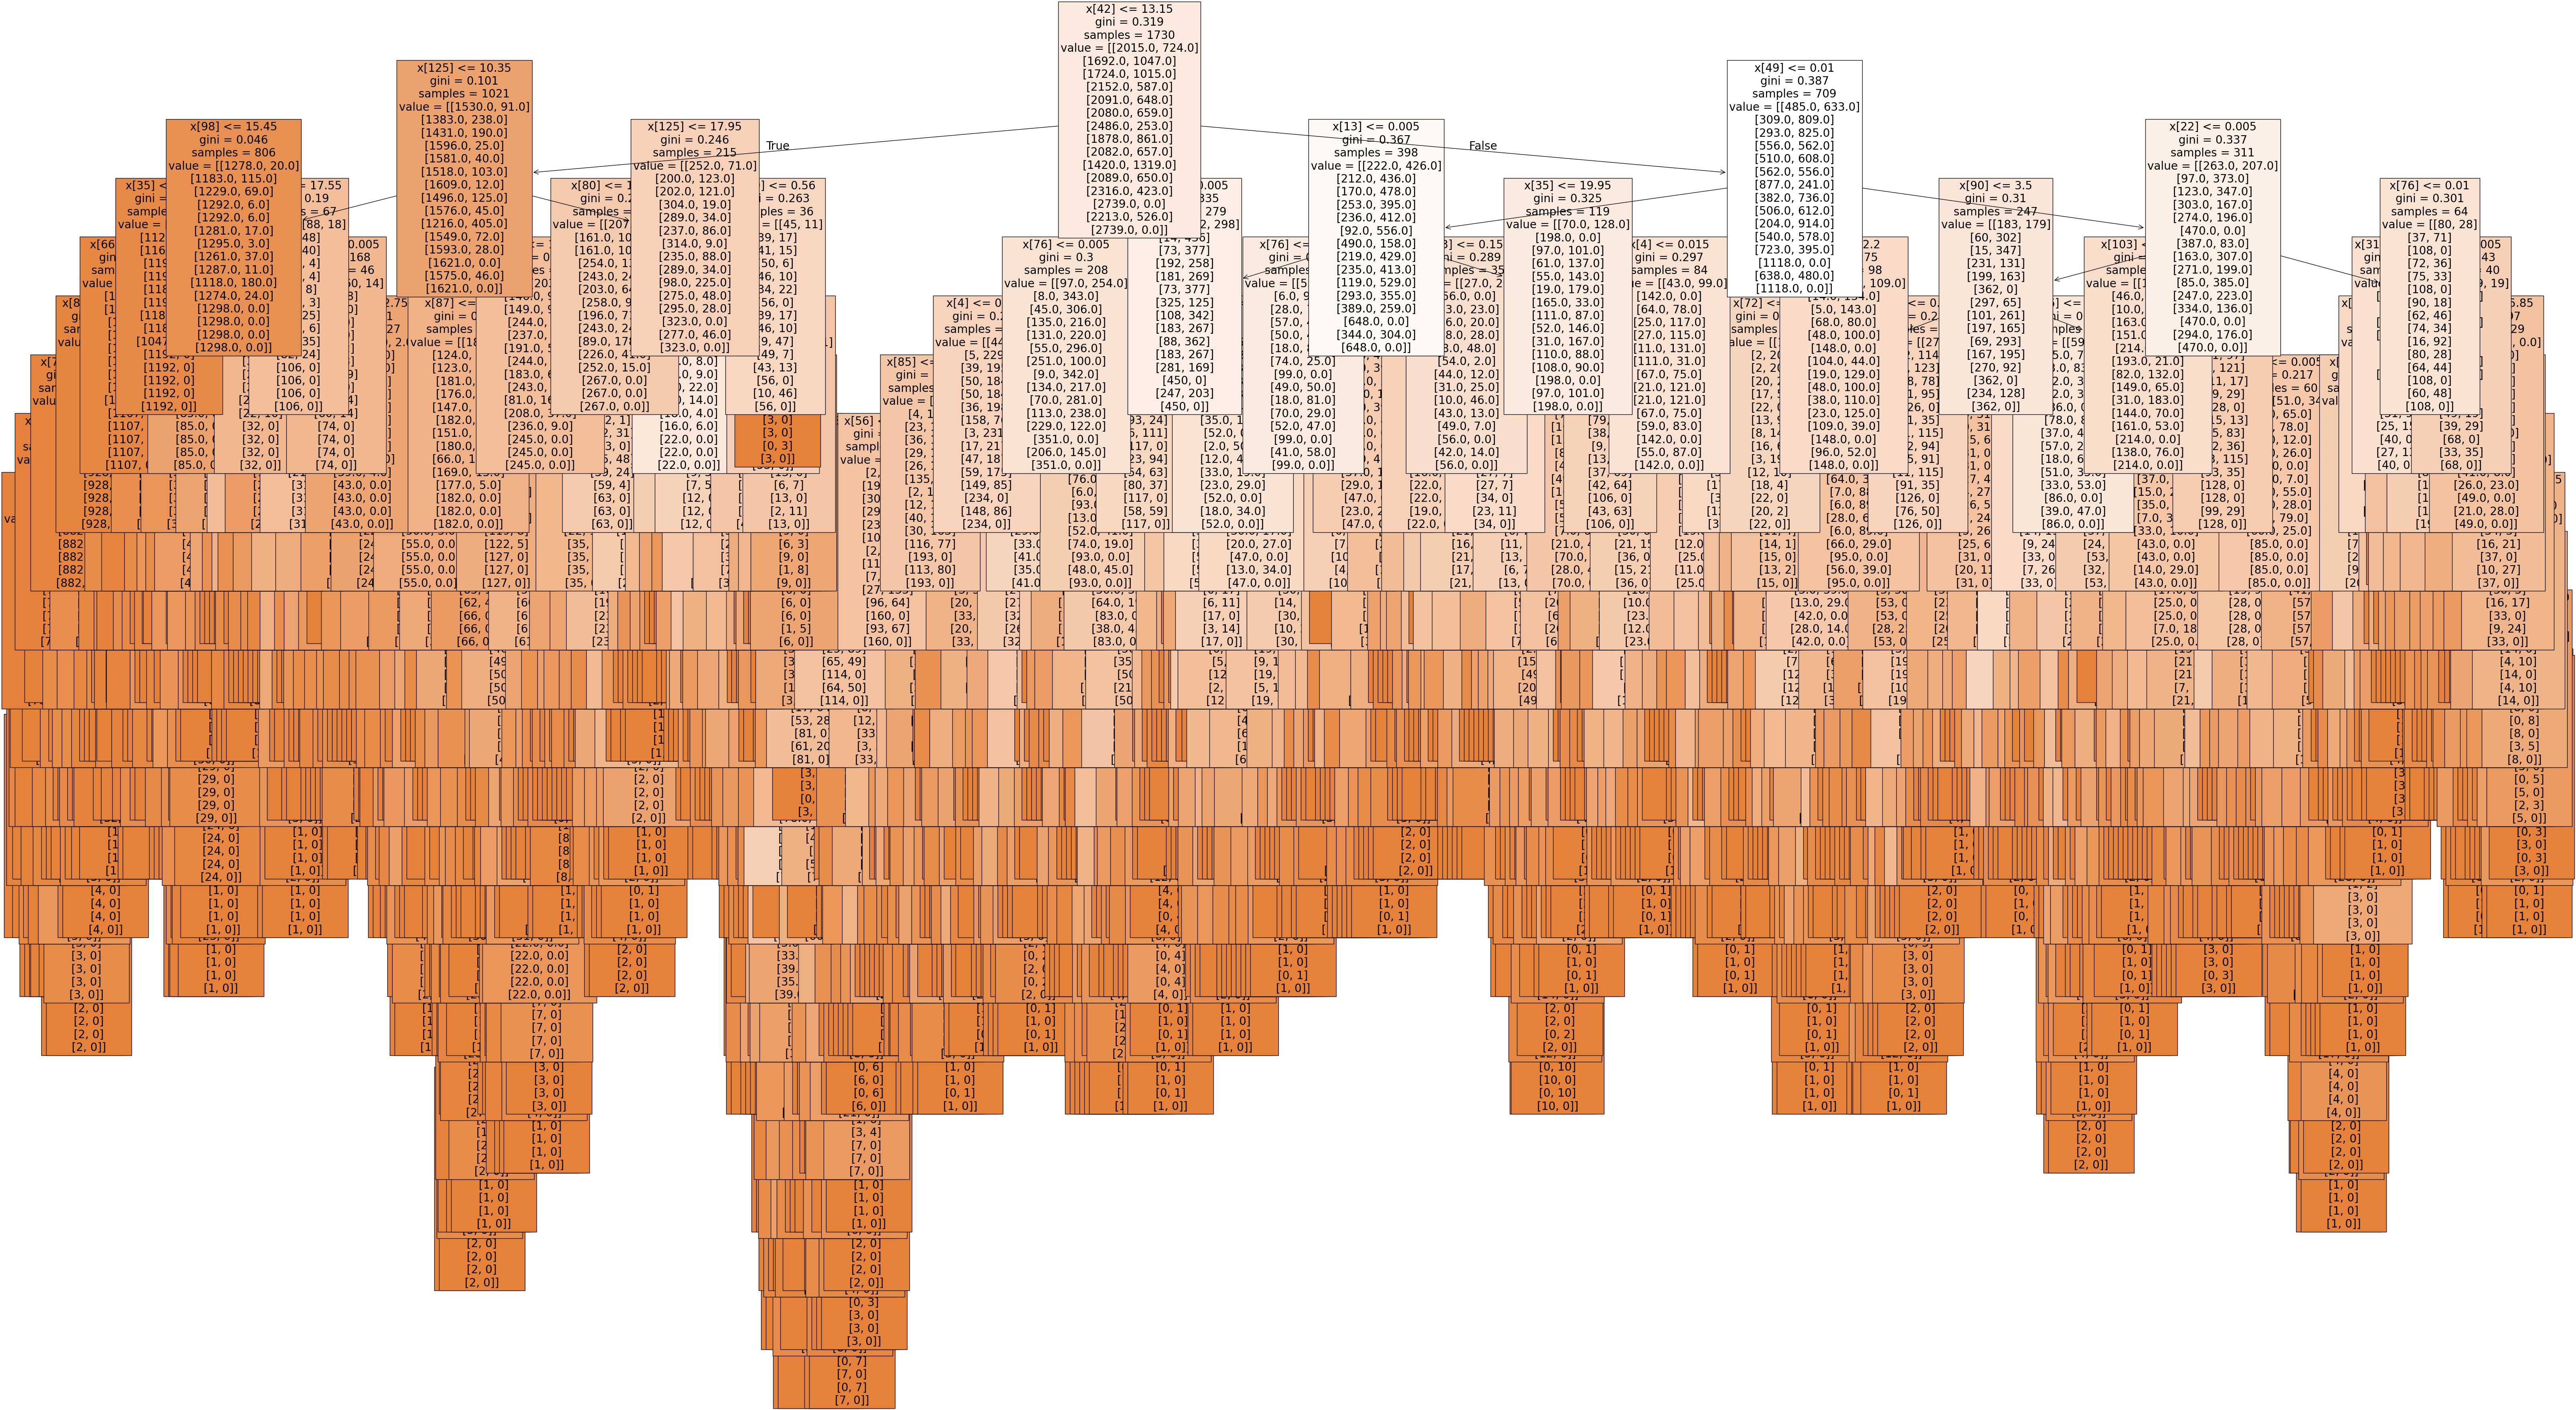

In [38]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [ ]:
fig.savefig(os.path.join(path, '04 Analysis', 'random_forest_2010s.png'),bbox_inches='tight')

## 06 Uncovering Feature Importances

In [40]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([3.09245276e-03, 3.74951007e-03, 3.32201801e-03, 3.73652872e-03,
       2.11553505e-02, 9.25652260e-03, 1.78265461e-02, 5.29747144e-03,
       2.95535505e-02, 3.87678334e-03, 3.77721317e-03, 3.85117766e-03,
       3.04632466e-03, 1.46091378e-02, 3.31293561e-03, 1.01517360e-02,
       5.63343050e-03, 6.55310664e-03, 3.59143739e-04, 0.00000000e+00,
       0.00000000e+00, 1.47744676e-03, 1.41263308e-02, 1.56902382e-03,
       1.13295382e-02, 8.51225852e-03, 2.34395782e-02, 2.53089621e-03,
       3.01749623e-03, 4.31294520e-03, 4.45979508e-03, 1.45261884e-02,
       5.04610595e-03, 1.34688621e-02, 3.27941057e-03, 3.87509944e-02,
       2.65401871e-03, 3.13692191e-03, 5.00933647e-03, 4.09986190e-03,
       1.90959184e-02, 6.98840654e-03, 3.58348492e-02, 3.01783481e-03,
       3.50149173e-02, 2.66902219e-03, 3.89122893e-03, 3.93337229e-03,
       4.13997069e-03, 1.06310819e-02, 4.46036089e-03, 1.06479361e-02,
       5.12379134e-03, 1.07054639e-02, 4.38056102e-03, 2.51104274e-03,
      

In [41]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.09245276e-03, 3.74951007e-03, 3.32201801e-03, 3.73652872e-03,
         2.11553505e-02, 9.25652260e-03, 1.78265461e-02, 5.29747144e-03,
         2.95535505e-02],
        [3.87678334e-03, 3.77721317e-03, 3.85117766e-03, 3.04632466e-03,
         1.46091378e-02, 3.31293561e-03, 1.01517360e-02, 5.63343050e-03,
         6.55310664e-03],
        [3.59143739e-04, 0.00000000e+00, 0.00000000e+00, 1.47744676e-03,
         1.41263308e-02, 1.56902382e-03, 1.13295382e-02, 8.51225852e-03,
         2.34395782e-02],
        [2.53089621e-03, 3.01749623e-03, 4.31294520e-03, 4.45979508e-03,
         1.45261884e-02, 5.04610595e-03, 1.34688621e-02, 3.27941057e-03,
         3.87509944e-02],
        [2.65401871e-03, 3.13692191e-03, 5.00933647e-03, 4.09986190e-03,
         1.90959184e-02, 6.98840654e-03, 3.58348492e-02, 3.01783481e-03,
         3.50149173e-02],
        [2.66902219e-03, 3.89122893e-03, 3.93337229e-03, 4.13997069e-03,
         1.06310819e-02, 4.46036089e-03, 1.06479361e-02, 5.12379134

In [42]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09698995, 0.05481185, 0.06081332, 0.08939269, 0.11485207,
       0.05620223, 0.0312032 , 0.09214488, 0.1051584 , 0.07032325,
       0.07707642, 0.06171637, 0.03185531, 0.05343165, 0.00402841])

In [43]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [44]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BELGRADE      0.114852
MADRID        0.105158
HEATHROW      0.096990
STOCKHOLM     0.092145
SONNBLICK     0.089393
MUNCHENB      0.077076
DUSSELDORF    0.070323
OSLO          0.061716
DEBILT        0.060813
LJUBLJANA     0.056202
KASSEL        0.054812
VALENTIA      0.053432
BUDAPEST      0.031855
BASEL         0.031203
MAASTRICHT    0.004028
dtype: float64

In [45]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['HEATHROW', 'KASSEL', 'DEBILT', 'SONNBLICK', 'BELGRADE', 'LJUBLJANA', 'BASEL', 'STOCKHOLM', 'MADRID', 'DUSSELDORF', 'MUNCHENB', 'OSLO', 'BUDAPEST', 'VALENTIA', 'MAASTRICHT']


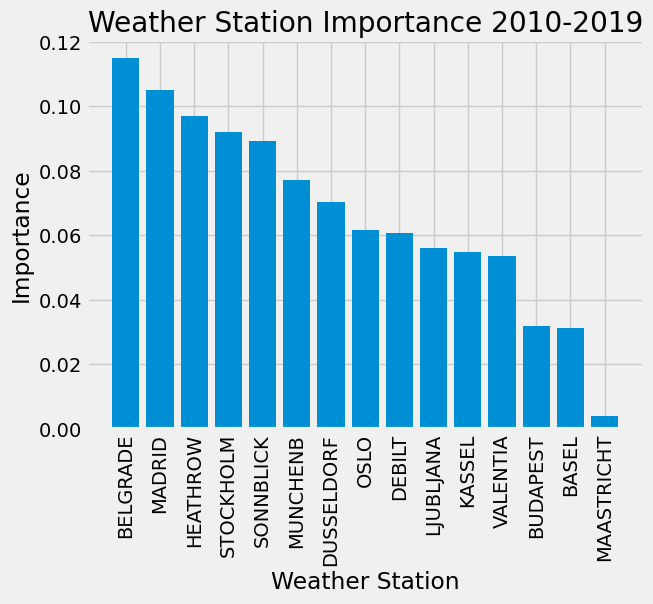

In [50]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010-2019')

plt.savefig(os.path.join(path, '04 Analysis', 'feature_importances.png'), bbox_inches='tight')

plt.show()